<a href="https://colab.research.google.com/github/analytistic/machine-learning/blob/main/Day2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title
# These packages used throughout, run me first!
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

# Day 2

In this lab session we will see explore in more detail the following:
- Linear Regression
- Using linear regression on real world data
- Difference of Overfitting and Underfitting
- Gradient Descent
- Batch Gradient Descent
- Stochastic Gradient Descent
- Polynomial Regression


# Linear Regression

## Task

Why are we using formula `y =  offset *X * np.random.rand(50,1) + (offset-X*offset/2)` to generate new dataset?
Because it closely reassembles real life accuracy of prediction over time (for example weather).

- Plot the data (hint: see [matplotlib](https://matplotlib.org/tutorials/) or take a look at some plotting code below or in lab one)
- Calculate linear regession for this dataset and plot it
- How can we increase accuracy? Try adding more points
- If you don't know how to plot the data, please check

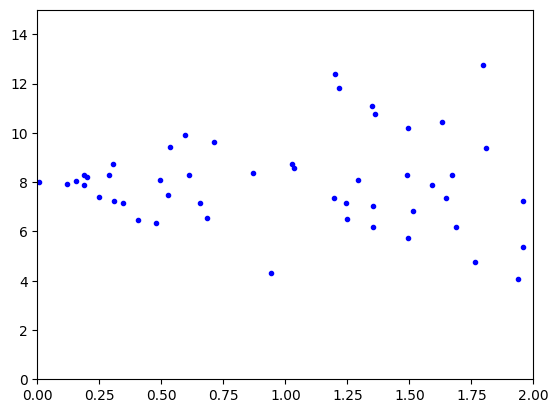

In [ ]:
offset = 8
X_1 = 2 * np.random.rand(50, 1)

y_1 =  offset * X_1 * np.random.rand(50, 1) + (offset-X_1*offset/2)
# Code to plot the data

plt.plot(X_1, y_1, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()


## Think about [multiple linear regression](https://en.wikipedia.org/wiki/Linear_regression#Simple_and_multiple_linear_regression)

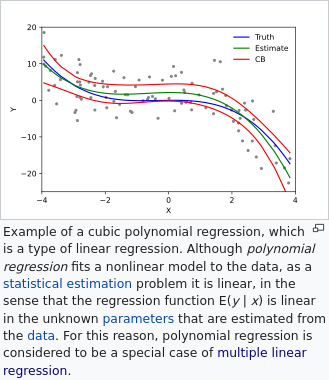

Above image and caption from Wikipedia

- Can we use linear regression for non linear functions?
- What are the issues with this approach?
- Look at the below plot and compare it with your previous plot: which dataset will likely result in a linear regression hypothesis that will fit its data best?

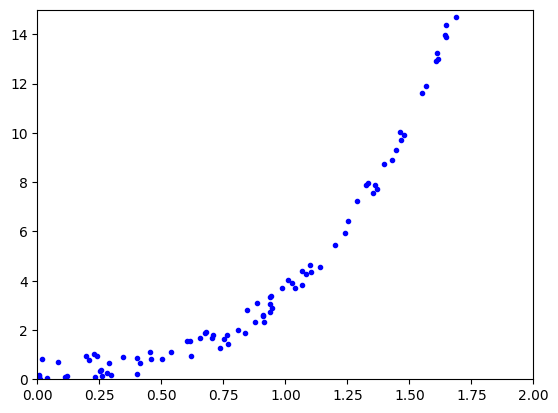

In [ ]:
X_2 = 2 * np.random.rand(100, 1)
y_2 =  3 * np.power(X_2, 3) + np.random.rand(100, 1)

plt.plot(X_2, y_2, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

## Task

The utility method `sklearn.model_selection.train_test_split` has been imported for you. Use it to create the `X_train_2, X_test_2, y_train_2, y_test_2` sets, using a 70:30 split and the `X_2, y_2` dataset.

Training dataset samples: (80, 1)
Training dataset targets: (80, 1)
Testing dataset samples: (20, 1)
Testing dataset targets: (20, 1)


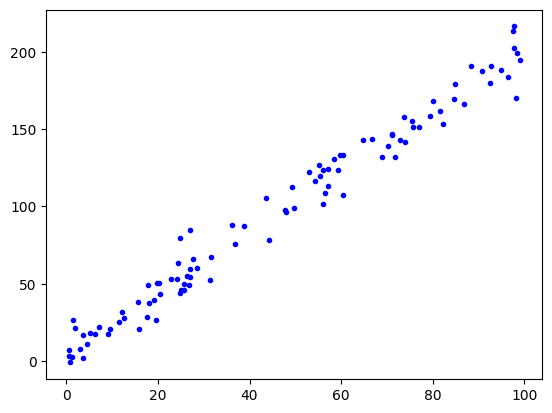

In [ ]:
# Your code here: create your training and testing sets
k, b = 2, 2
var = 10
e = var*(np.random.randn(100,1))
X_3 = 100*np.random.rand(100, 1)
y_3 = k*X_3+b+e
plt.plot(X_3,y_3,'b.')

#划分数据集

X = X_3
y = y_3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Training dataset samples:', X_train.shape)
print('Training dataset targets:', y_train.shape)
print('Testing dataset samples:', X_test.shape)
print('Testing dataset targets:', y_test.shape)


## Task
- Now use `scikit-learn`'s `LinearRegression` to do linear regression
- How? Take a look at its [class documentation and examples](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- The `sklearn.linear_model.LinearRegression` class has already been imported for you as `LinearRegression`, which lets you create a linear regression model object that offers `.fit(X, y)` and `.predict(samples)` methods. Create the model and call it `lre_2` (linear regression for dataset 2)

In [ ]:
# Your code here: perform Linear Regression using sci-kit learn's LinearRegression class, using your training sets

reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)



[[1.99448814]]
[3.85042249]


### Task

How well does your model work? Use its `.predict(samples)` method with your testing samples.

Plot in a different colour the (1) training dataset, (2) testing dataset, (3) your model's estimation for the testing dataset.

Has your model captured the relationship between the dependent and independent variable well?

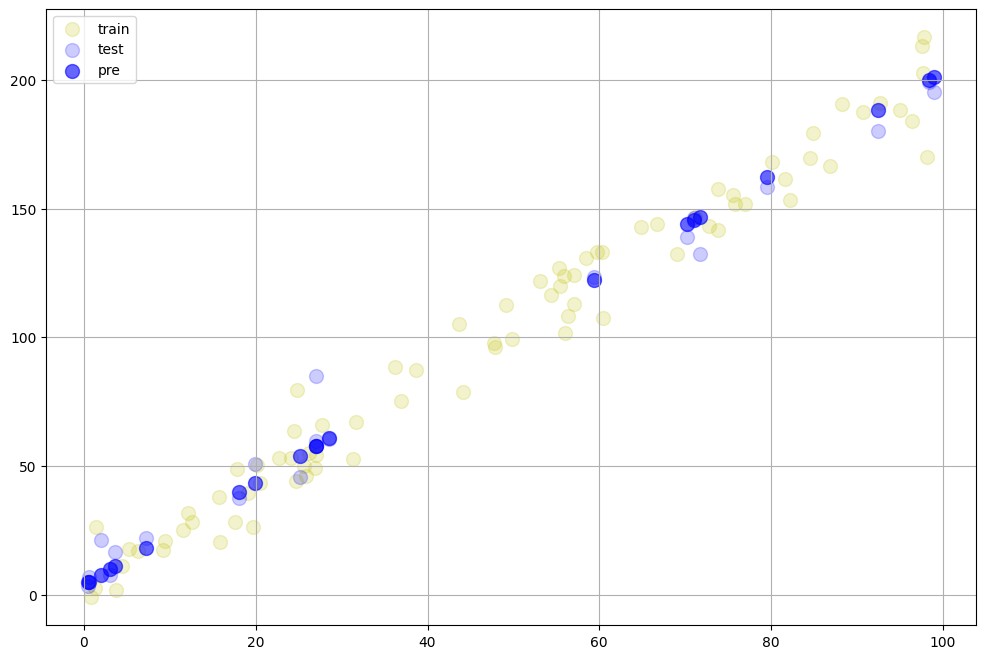

In [ ]:
# Your code here: plot results
y_test_pre = reg.predict(X_test)
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='y', alpha=0.2, label='train', s=100)
plt.scatter(X_test, y_test, color='b', alpha=0.2, label='test', s=100)
plt.scatter(X_test, y_test_pre, color='b', alpha=0.6, label='pre', s=100)
# plt.plot(X_test, y_test_pre,'b-',lw=1)
plt.grid(True)
plt.legend()




# Linear Regression on real data

To train a Linear Regression classifier on real life data, we will be using the `diabetes` dataset publicly available and visualising the resulting value of `theta`.

The dataset is [described here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html?highlight=diabetes#sklearn.datasets.load_diabetes). **You can also hover over methods, library imports, and objects for quick info in Colab, handy!**

## Task
- Split the dataset into training and testing portions. Use an 80:20 split.
- Create the linear regression model

**Question 1/1**: What features are present in the `diabetes` dataset? Answer in SurreyLearn questions for this lab.

In [ ]:
diabetes = datasets.load_diabetes()
print('Data type:', type(diabetes))
print('Description:', diabetes['DESCR'])
print('Dataset shape (data):', diabetes.data.shape)
print('Dataset shape (targets):', diabetes.target.shape)
print(f'Data range: min {np.min(diabetes.data)}, max {np.max(diabetes.data)}')
print(f'Target range: min {np.min(diabetes.target)}, max {np.max(diabetes.target)}')
print('First sample is of type', type(diabetes.data[0]))

Data type: <class 'sklearn.utils._bunch.Bunch'>
Description: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level


Before: (442, 10) After: (442, 1)
Think about: what did we just remove, exactly?


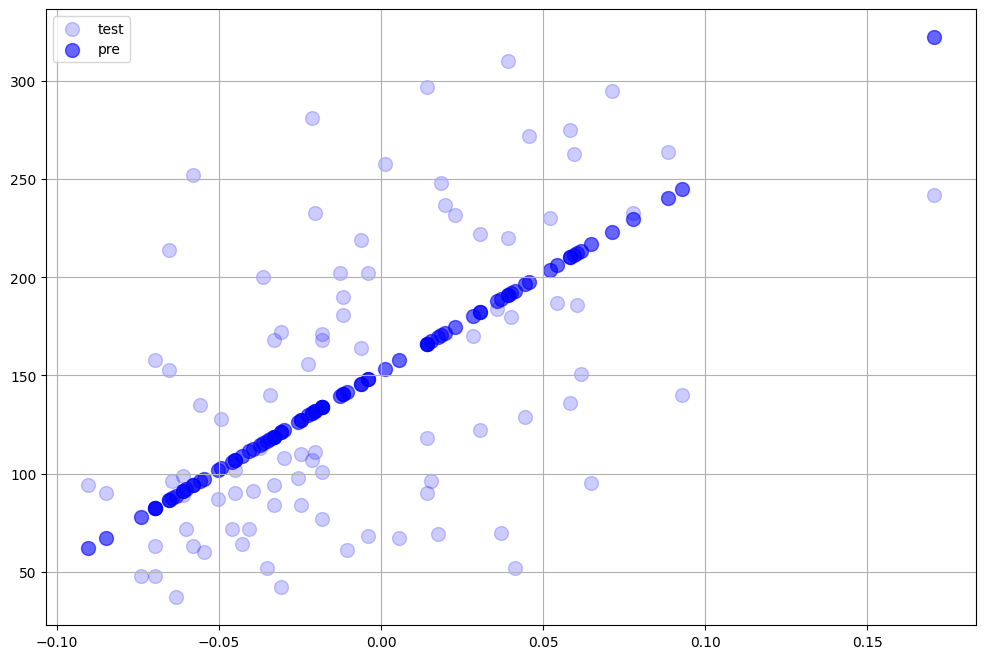

In [ ]:
# Load the diabetes dataset
# Try hovering!     load_diabetes()
#                   vvvvvvvvvvvvvvv
diabetes = datasets.load_diabetes()

# Use only one feature
# None expands the dims, see: https://numpy.org/devdocs/user/basics.indexing.html#dimensional-indexing-tools
# This says
# 1. 'get all entries in the sample list',
# 2. 'create a new [] array dimension',
# 3. 'taking only the second index of each'
diabetes_X = diabetes.data[:, None, 2]
print('Before:', diabetes.data.shape, 'After:', diabetes_X.shape)
print('Think about: what did we just remove, exactly?')

# Your code here: split the dataset into X_train_dia, X_test_dia, y_train_dia, y_test_dia
diabetes_y = diabetes.target

X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)


# Your code here: create the model
model = LinearRegression()


# Your code here: train the model

reg = model.fit(X_train_dia, y_train_dia)



# Your code here: plot the testing set (samples and targets) and the model's predictions for the testing samples

y_test_dia_pre = reg.predict(X_test_dia)
plt.figure(figsize=(12, 8))
# plt.scatter(X_train_dia, y_train_dia, color='y', alpha=0.2, label='train', s=100)
plt.scatter(X_test_dia, y_test_dia, color='b', alpha=0.2, label='test', s=100)
plt.scatter(X_test_dia, y_test_dia_pre, color='b', alpha=0.6, label='pre', s=100)
# plt.plot(X_test_dia, y_test_dia_pre, 'b-')
plt.grid(True)
plt.legend()



# Underfitting and Overfitting

The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called **underfitting**.  
A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will **overfit** the training data, i.e. it learns the noise of the training data.  
We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the **mean squared error (MSE)** on the validation set, the higher, the less likely the model generalizes correctly from the training data.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 一个sample_n=4, degree=2的数据x=y=[1,2,3,4]
#np.array中，同一行是同一sample，同一列是同一dim
X=[[1,1],[2,2],[3,3],[4,4]]

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
#fit_transform会返回x,y,x^2,y^2,xy
X_poly = polynomial_features.fit_transform(X)

print(X)
print(X_poly)

[[1, 1], [2, 2], [3, 3], [4, 4]]
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  4.  4.  4.]
 [ 3.  3.  9.  9.  9.]
 [ 4.  4. 16. 16. 16.]]


In [ ]:
#在下面的代码中X一开始是一个（3，）一维数组，
#为了使用PolynomialFeatures必须先转成（3，1）的二维数组，每一行代表一个样本，每一列是一个特征
X = [1,2,3]
X = np.array(X)
print(X.shape)

#：选择所有行，对于(3,)一维数组没有行的概念，即选择全体，np.newaxis添加一个维度变成(3,1)
X_2d = X[:, np.newaxis]
print(X_2d)


(3,)
[[1]
 [2]
 [3]]


[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]


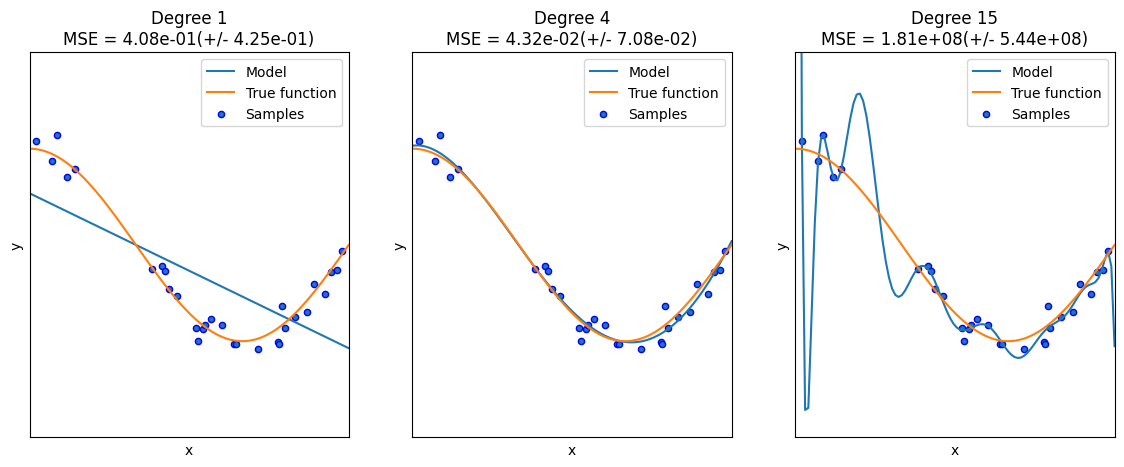

In [ ]:
# Big code cell for some pretty graphs!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)


n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
print(X)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    # 使用subplot添加一个1行3列的axes对象，并指定为第i+1个
    ax = plt.subplot(1, len(degrees), i + 1)
    # setp用于设置ax的任何元素，这里设置x，y轴不显示刻度
    plt.setp(ax, xticks=(), yticks=())

    # 一个X^i特征生成器
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)

    linear_regression = LinearRegression()

    #pipline是一个sklearn的类，用于对原始数据进行特征转换和数据拟合，[.]内是步骤列表，每一个步骤是(name,transform)元组
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Gradient Descent

This is an algorithm capable of finding optimal solutions to a wide range of problems.  
The parameters are tweaked to minimise the cost function.

However it is important to make sure that the **learning rate** is tweaked to an optimal value. Otherwise we can end up in a situation where the "step" is too small or too large. The undesired effects of that are as seen on the illustration below.

![Gradient Descent](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/gd.png)

In addition, the cost functions very rarely look orderly like the ones used for demonstration pruposes above. Usually the have a complex shape.

This poses a new challenge - to avoid the Local minimum.

![Local Minimum](https://raw.githubusercontent.com/wOOL/COM2028/master/W4/local_min.png)

# Batch Gradient Descent

Batch Gradient Descent, also called vanilla gradient descent, calculates the error for each example within the training dataset, but only after all training examples have been evaluated, the model gets updated. This whole process is like a cycle and called a training epoch.

Advantages of it are that it’s computational efficient, it produces a stable error gradient and a stable convergence. Batch Gradient Descent has the disadvantage that the stable error gradient can sometimes result in a state of convergence that isn’t the best the model can achieve. It also requires that the entire training dataset is in memory and available to the algorithm.

收敛稳定性问题
批量梯度下降在收敛稳定性上的问题主要体现在以下几点：

局部最小值：由于梯度计算是对整个数据集的平均处理，因此误差曲线较为平滑，这虽然带来了稳定性，但也可能导致算法陷入局部最小值，难以跳出，从而无法达到全局最优。

鞍点问题：类似地，梯度的稳定性可能使得模型在鞍点处停滞，鞍点是指梯度为零但不是全局或局部最小值的点。

缺乏随机性：批量梯度下降在每个周期都使用整个数据集来计算梯度，缺乏随机性，容易导致收敛到次优解。相比之下，随机梯度下降（SGD）由于每次只使用一个样本更新参数，具有更高的随机性，可以帮助算法跳出局部最小值。

In [23]:
eta =  0.1
n_iterations = 1000
m = 100

#Generate random dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)
# print("X:",X,"\ny：",y)
X_new = np.array([[0], [2]])
X_b = np.c_[np.ones((100, 1)), X]
X_new_b = np.c_[np.ones((2,1)), X_new]


theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.49053201],
       [2.97715206]])

In [ ]:
X_new_b.dot(theta)

array([[ 4.49053201],
       [10.44483613]])

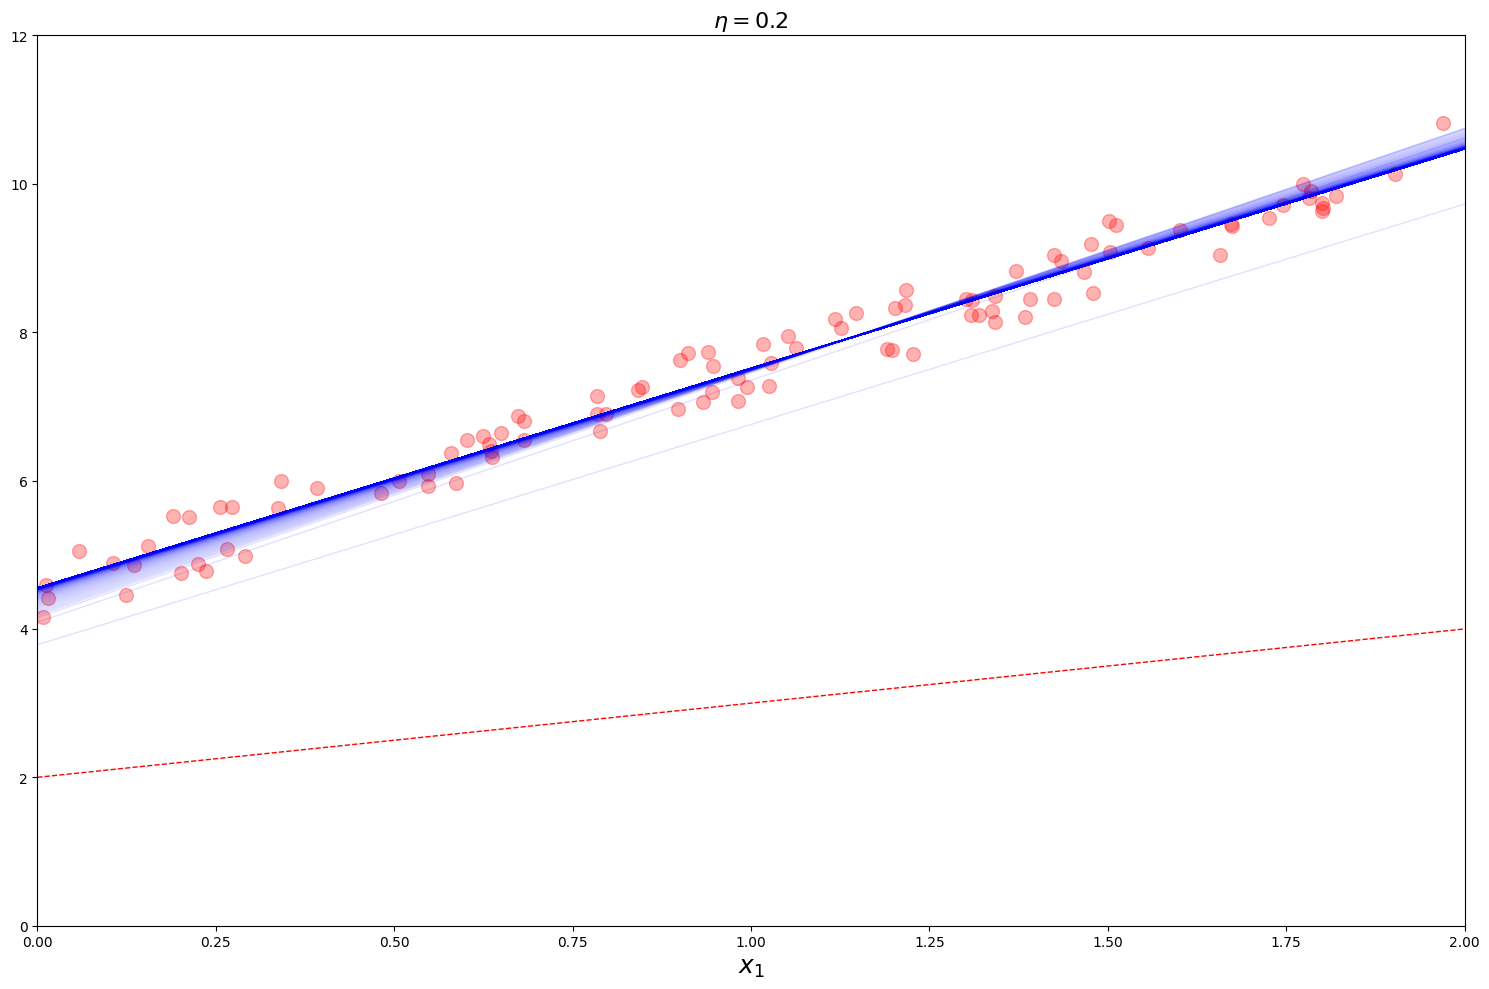

In [140]:
from matplotlib.colors import to_rgba
theta_path_bdg = []
def sigmoid(x):
    x0 = -2
    return 1 / (1 + np.exp(-(x+x0)))

def plot_gradient_descent(theta, eta, theta_path=None):

    plt.figure(figsize=(15,10))
    plt.scatter(X, y, c = 'r', alpha = 0.3, s=100)
    m = len(X_b)
    n_iterations = 1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        style = "b-" if iteration > 0 else "r--"
        alpha = sigmoid(iteration/n_iterations) if iteration > 0 else 1
        color = to_rgba('blue', alpha=alpha)  # 设置颜色和透明度
        plt.plot(X_new, y_predict, style, alpha=alpha,linewidth=1)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 12])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    plt.tight_layout()  # 自适应窗口大小显示全部内容


theta = [[2],[1]]
plot_gradient_descent(theta, 0.2, theta_path_bdg)
#print(theta_path_bdg)

## Task
Modify the method above to plot **every 100th** iteration instead of first ten.

In [138]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    # plt.plot(X, y, "b.")
    n_iterations = 1000
    # Your code here
    # plt.figure(figsize=(15,10))
    plt.scatter(X, y, c = 'r', alpha = 0.3)
    m = len(X_b)
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        style = "b-" if iteration > 0 else "r--"
        alpha = sigmoid(iteration/n_iterations) if iteration > 0 else 1
        color = to_rgba('blue', alpha=alpha)  # 设置颜色和透明度
        plt.plot(X_new, y_predict, style, alpha=alpha,linewidth=1)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    plt.tight_layout()  # 自适应窗口大小显示全部内容


Observe the effect different learning rate values have on the training process.

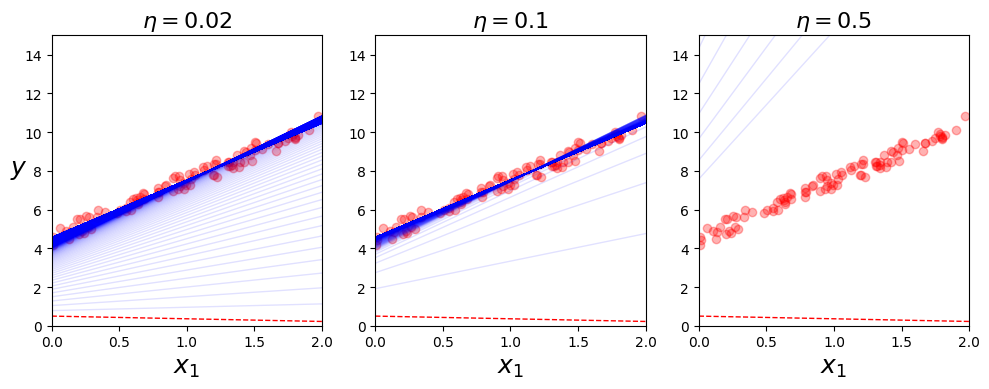

In [139]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# Stochastic Gradient Descent

The Stochastic Gradient Descent approach picks a random instance in the training set at every step and computes the gradients based on that single distance.

This makes the algorithm much faster than other approaches. Due to the stochastic nature of this algorithm it will continue to bounce even when reaching very close to the minimum and never settle down. What this means that the solution found is close to the optimal solution, but not optimal.

In [141]:
# Generate random dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)
X_new = np.array([[0], [2]])
X_b = np.c_[np.ones((100, 1)), X]
X_new_b = np.c_[np.ones((2,1)), X_new]


theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [142]:
# Code Implementation
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

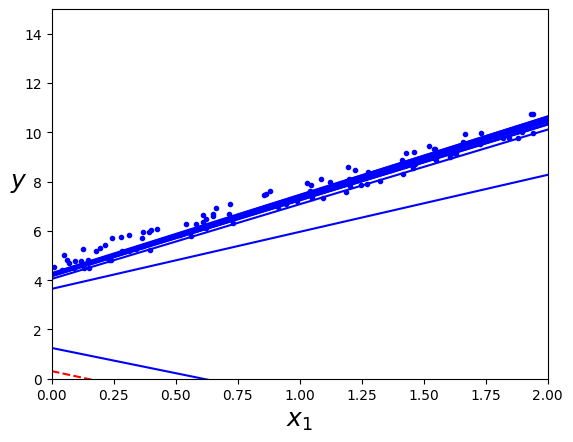

In [143]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [144]:
theta

array([[4.5448728 ],
       [2.97592715]])

In [146]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

InvalidParameterError: The 'tol' parameter of SGDRegressor must be a float in the range [0, inf) or None. Got -inf instead.

In [147]:
sgd_reg.intercept_, sgd_reg.coef_

AttributeError: 'SGDRegressor' object has no attribute 'intercept_'

# Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an n-th degree polynomial.  

Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted `E(y |x)`

If you need more information please read the following article in full:
https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

In [148]:
# Generate some data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Now that we have generated data, we can plot it for better visualisation.

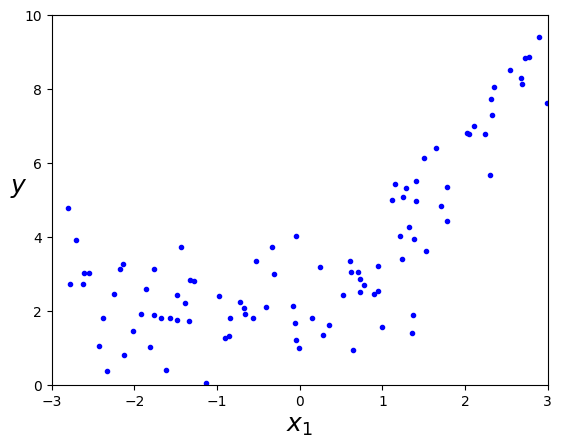

In [149]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [158]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.76867948])

In [151]:
X_poly[0]

array([-1.76867948,  3.12822709])

In [166]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
#lin_reg.predict(X_poly)

(array([2.02301132]), array([[1.00929338, 0.51805922]]))

## Task
- Let's plot the predictions in following

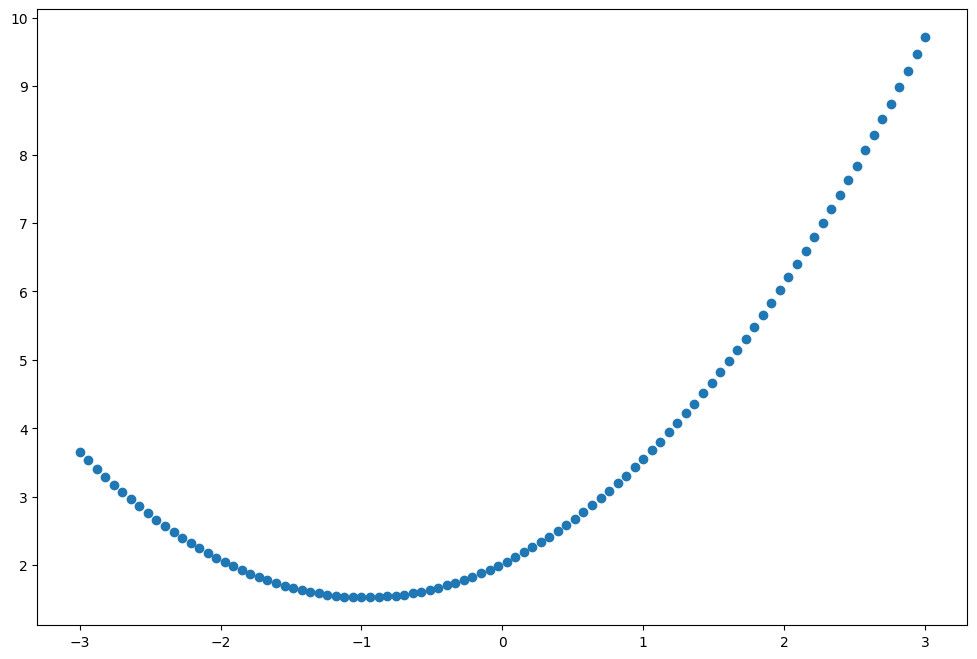

In [168]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# Your code here: plot the predictions
plt,plt.figure(figsize=(12,8))

plt.scatter(X_new, y_new)

Need to consider which degree is most suitable, avoid **overfit** or **underfit**.

**Advantages** of using Polynomial Regression:

- Broad range of function can be fit under it.
- Polynomial basically fits wide range of curvature.
- Polynomial provides the best approximation of the relationship between dependent and independent variable.

**Disadvantages** of using Polynomial Regression

- These are too sensitive to the outliers.
- The presence of one or two outliers in the data can seriously affect the results of a nonlinear analysis.
- In addition there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.


In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.